# Image Classification using DNN

## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Shape of data  

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## Datatype of dataset

In [4]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

## Creating validation data and scaling data to range (0-1)

In [5]:
X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

## Looking at first two images

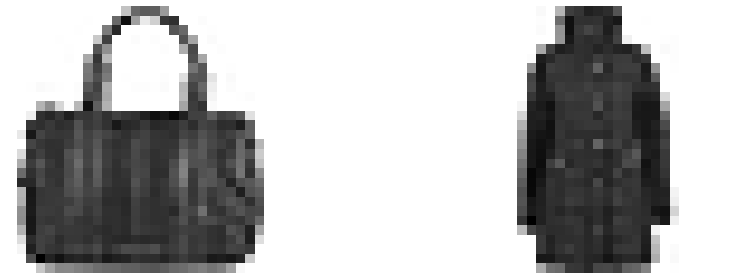

In [6]:
plt.figure(figsize = (15, 4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_classes = len(class_names)

In [8]:
class_names[y_train[0]], class_names[y_train[1]] 

('Bag', 'Coat')

## Model Building

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

## Compiling model

In [10]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

## Fitting model

In [11]:
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 6s 2ms/step - loss: 0.5205 - accuracy: 0.8146 - val_loss: 71.2726 - val_accuracy: 0.8227
Epoch 2/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3793 - accuracy: 0.8622 - val_loss: 48.8764 - val_accuracy: 0.8560
Epoch 3/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8739 - val_loss: 58.1678 - val_accuracy: 0.8530
Epoch 4/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3224 - accuracy: 0.8811 - val_loss: 52.0062 - val_accuracy: 0.8503
Epoch 5/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.8886 - val_loss: 52.4130 - val_accuracy: 0.8480
Epoch 6/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2906 - accuracy: 0.8928 - val_loss: 45.1732 - val_accuracy: 0.8717
Epoch 7/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.8958 - val_loss: 55.1448 - val_ac

## Evaluating model


In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4876 - accuracy: 0.8884


[0.48762181401252747, 0.8884000182151794]

## Visualizing Training and Validation Loss

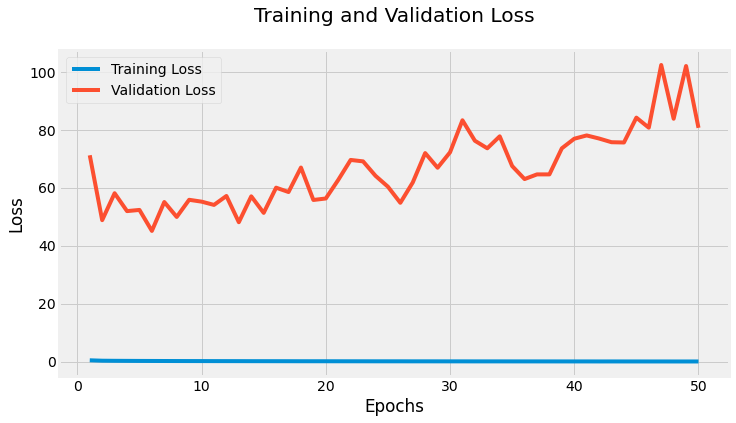

In [13]:
plt.figure(figsize = (12, 6))
plt.style.use('fivethirtyeight')

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

## Visualizing Training and Validation accuracy

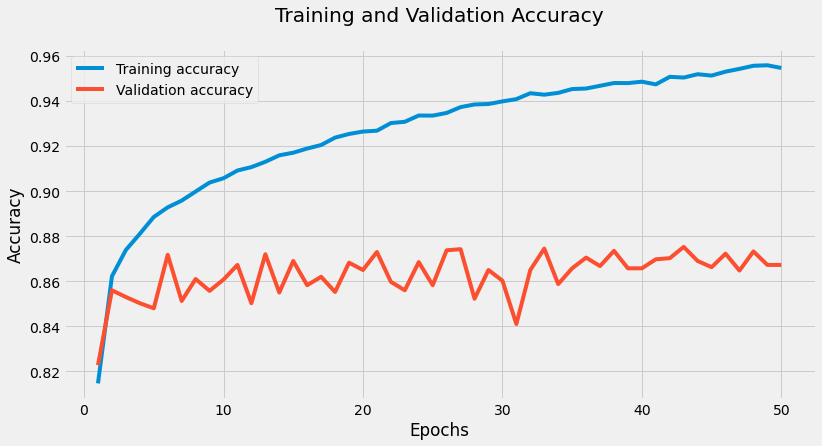

In [14]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

## Making predictions

In [15]:
y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

313/313 [==============================] - 0s 892us/step


In [16]:
label_binarizer = LabelBinarizer()
y_test = label_binarizer.fit_transform(y_test)
y_pred = model.predict(X_test)
y_test_categorical = np.argmax(y_test, axis=1)
y_pred_categorical = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 897us/step


In [17]:
accuracy = accuracy_score(y_test_categorical, y_pred_categorical)
print('Accuracy: ',accuracy)
precision = precision_score(y_test_categorical, y_pred_categorical,average='weighted')
print('Precision: ',precision)
recall = recall_score(y_test_categorical, y_pred_categorical,average='weighted')
print('Recall: ',recall)
f1 = f1_score(y_test_categorical, y_pred_categorical,average='weighted')
print('F1 Score: ',f1)

Accuracy:  0.8884
Precision:  0.8885271581540294
Recall:  0.8884
F1 Score:  0.888195942108577
